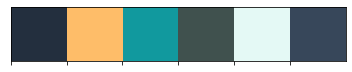

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
costum_colors = ["#232F3E","#FEBD69","#11999E","#40514E","#E4F9F5","#37475A"]
sns.set_palette(sns.color_palette(costum_colors))
sns.palplot(costum_colors)

In [2]:
books = "output/combined_book.csv"
books_df = pd.read_csv(books)
books_df.head()

,rank,primary_isbn13,publisher,title,author,category,pub_date,Amazon Product ID,Amazon Rating,Amazon Rating Total,Amazon Price
0,11,9781982168018,Gallery,TASTE,Stanley Tucci,Hardcover Nonfiction,2022-02-06,1982168013,4.7,3118.0,14.00
1,8,9780062888341,Harper,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,2022-02-06,006288834X,4.6,9966.0,15.07
2,10,9780385547932,Doubleday,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,2022-02-06,B091XWH5T2,4.2,204.0,14.99
3,11,9780593465066,Viking,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,2022-02-06,0593465067,4.9,1794.0,14.53
4,12,9781982168438,Scribner,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,2022-02-06,B08TRMSR3Z,4.5,8792.0,15.99


In [3]:
books_df.columns

Index(['rank', 'primary_isbn13', 'publisher', 'title', 'author', 'category',
       'pub_date', 'Amazon Product ID', 'Amazon Rating', 'Amazon Rating Total',
       'Amazon Price'],
      dtype='object')

In [4]:
books_df.columns = ['NYT Ranking', 'ISBN', 'Publisher', 'Title', 'Author', 'Book Category',
       'NYT Pub Date', 'Amazon Product ID', 'Num of Amz Ratings', 'Amazon Rating Total',
       'Amazon Price']
books_df

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Num of Amz Ratings,Amazon Rating Total,Amazon Price
0,11,9781982168018,Gallery,TASTE,Stanley Tucci,Hardcover Nonfiction,2022-02-06,1982168013,4.7,3118.0,14.00
1,8,9780062888341,Harper,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,2022-02-06,006288834X,4.6,9966.0,15.07
2,10,9780385547932,Doubleday,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,2022-02-06,B091XWH5T2,4.2,204.0,14.99
3,11,9780593465066,Viking,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,2022-02-06,0593465067,4.9,1794.0,14.53
4,12,9781982168438,Scribner,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,2022-02-06,B08TRMSR3Z,4.5,8792.0,15.99
...,...,...,...,...,...,...,...,...,...,...,...
1232,18,9780312547745,St. Martin's Press,"THE WALKING DEAD, RISE OF THE GOVERNOR",Robert Kirkman and Jay Bonansinga,Combined Print Fiction,2012-11-04,B009RFHNB8,4.5,930.0,0.00
1233,15,9780399157707,Penguin Group,MAD RIVER,John Sandford,Combined Print Fiction,2012-11-04,B0085DP6EY,4.6,3011.0,9.99
1234,12,9781439152805,Atria Books,THE SECRET KEEPER,Kate Morton,Combined Print Fiction,2012-11-04,B009R5Q51W,4.5,7219.0,0.00
1235,2,9780345504982,Random House Publishing,THE TWELVE,Justin Cronin,Combined Print Fiction,2012-11-04,B009RFGP8K,4.5,4496.0,0.00


In [5]:
data_new1 = books_df.copy()                              
data_new1 = data_new1.replace(r'^s*$', float('NaN'), regex = True)  
data_new1_df = pd.DataFrame(data_new1)
data_new1_df

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Num of Amz Ratings,Amazon Rating Total,Amazon Price
0,11,9781982168018,Gallery,TASTE,Stanley Tucci,Hardcover Nonfiction,2022-02-06,1982168013,4.7,3118.0,14.00
1,8,9780062888341,Harper,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,2022-02-06,006288834X,4.6,9966.0,15.07
2,10,9780385547932,Doubleday,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,2022-02-06,B091XWH5T2,4.2,204.0,14.99
3,11,9780593465066,Viking,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,2022-02-06,0593465067,4.9,1794.0,14.53
4,12,9781982168438,Scribner,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,2022-02-06,B08TRMSR3Z,4.5,8792.0,15.99
...,...,...,...,...,...,...,...,...,...,...,...
1232,18,9780312547745,St. Martin's Press,"THE WALKING DEAD, RISE OF THE GOVERNOR",Robert Kirkman and Jay Bonansinga,Combined Print Fiction,2012-11-04,B009RFHNB8,4.5,930.0,0.00
1233,15,9780399157707,Penguin Group,MAD RIVER,John Sandford,Combined Print Fiction,2012-11-04,B0085DP6EY,4.6,3011.0,9.99
1234,12,9781439152805,Atria Books,THE SECRET KEEPER,Kate Morton,Combined Print Fiction,2012-11-04,B009R5Q51W,4.5,7219.0,0.00
1235,2,9780345504982,Random House Publishing,THE TWELVE,Justin Cronin,Combined Print Fiction,2012-11-04,B009RFGP8K,4.5,4496.0,0.00


In [6]:
data_new2 = data_new1.copy()                          
data_new2.dropna(inplace = True)                     
data_new2_df = pd.DataFrame(data_new2)
data_new2_df

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Num of Amz Ratings,Amazon Rating Total,Amazon Price
0,11,9781982168018,Gallery,TASTE,Stanley Tucci,Hardcover Nonfiction,2022-02-06,1982168013,4.7,3118.0,14.00
1,8,9780062888341,Harper,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,2022-02-06,006288834X,4.6,9966.0,15.07
2,10,9780385547932,Doubleday,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,2022-02-06,B091XWH5T2,4.2,204.0,14.99
3,11,9780593465066,Viking,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,2022-02-06,0593465067,4.9,1794.0,14.53
4,12,9781982168438,Scribner,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,2022-02-06,B08TRMSR3Z,4.5,8792.0,15.99
...,...,...,...,...,...,...,...,...,...,...,...
1232,18,9780312547745,St. Martin's Press,"THE WALKING DEAD, RISE OF THE GOVERNOR",Robert Kirkman and Jay Bonansinga,Combined Print Fiction,2012-11-04,B009RFHNB8,4.5,930.0,0.00
1233,15,9780399157707,Penguin Group,MAD RIVER,John Sandford,Combined Print Fiction,2012-11-04,B0085DP6EY,4.6,3011.0,9.99
1234,12,9781439152805,Atria Books,THE SECRET KEEPER,Kate Morton,Combined Print Fiction,2012-11-04,B009R5Q51W,4.5,7219.0,0.00
1235,2,9780345504982,Random House Publishing,THE TWELVE,Justin Cronin,Combined Print Fiction,2012-11-04,B009RFGP8K,4.5,4496.0,0.00


In [7]:
data_new2_df.columns

Index(['NYT Ranking', 'ISBN', 'Publisher', 'Title', 'Author', 'Book Category',
       'NYT Pub Date', 'Amazon Product ID', 'Num of Amz Ratings',
       'Amazon Rating Total', 'Amazon Price'],
      dtype='object')

In [8]:
data_new2_df.duplicated(subset=['ISBN']).sum()

38

In [9]:
data_new2_df.drop_duplicates(subset=['ISBN'],inplace=True)

# What is the 10 top  rating books and Authors with the most star rating?

In [10]:
#Top Rating Books
Top_Rating_Books_df=data_new2.sort_values(by="Num of Amz Ratings", ascending=False)\
[["Book Category", "Title", "Author","Num of Amz Ratings","Amazon Rating Total"]].head(10)


Top_Rating_Books_df

,Book Category,Title,Author,Num of Amz Ratings,Amazon Rating Total
49,Combined Print Nonfiction,QUIET,Susan Cain,5.0,3.0
1005,Combined Print Nonfiction,QUIET,Susan Cain,5.0,3.0
777,E-Book Nonfiction,HUNGRY HEART,Jennifer Weiner,5.0,8.0
354,Hardcover Nonfiction,THE BOMBER MAFIA,Malcolm Gladwell,5.0,1.0
308,Hardcover Fiction,ROCK PAPER SCISSORS,Alice Feeney,5.0,10.0
170,Hardcover Fiction,PROJECT HAIL MARY,Andy Weir,5.0,2.0
139,Hardcover Nonfiction,AMERICAN MARXISM,Mark R. Levin,4.9,26872.0
332,Hardcover Nonfiction,THE AUTHORITARIAN MOMENT,Ben Shapiro,4.9,2982.0
999,Combined Print Nonfiction,SUM IT UP,Pat Head Summitt with Sally Jenkins,4.9,1134.0
107,Hardcover Nonfiction,RED-HANDED,Peter Schweizer,4.9,45.0


### Observation:It looks like the 5 star books haven't been popular in Amazon yet.


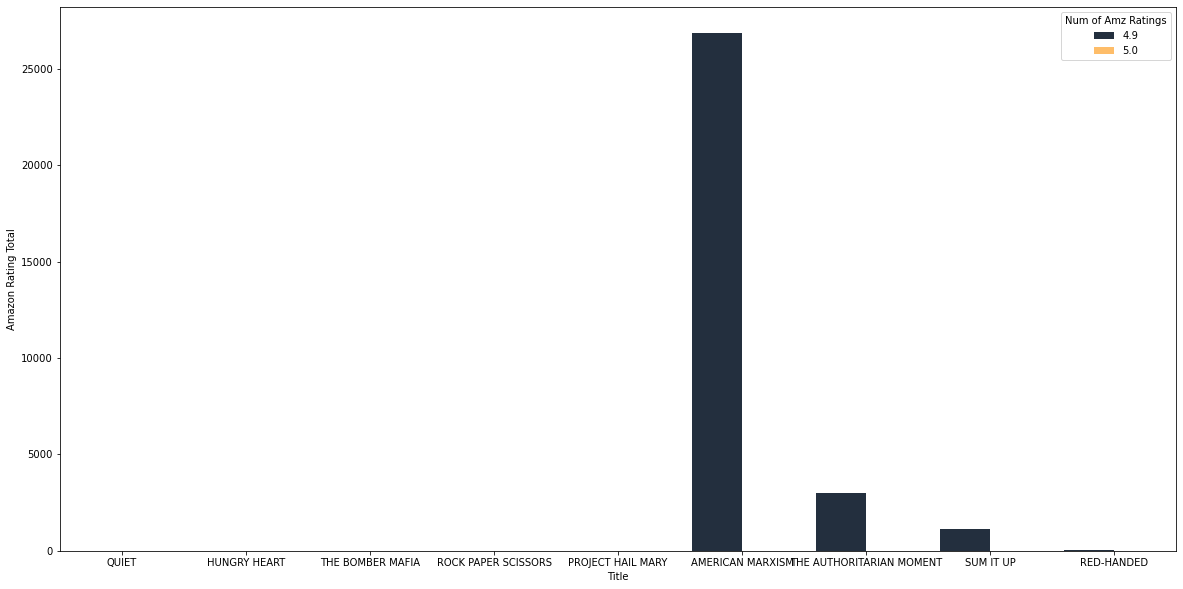

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(x="Title", y="Amazon Rating Total", data=Top_Rating_Books_df,hue='Num of Amz Ratings',palette=costum_colors,saturation=1)


### What is the Average price of books in every categories?

In [12]:
# price_average for every category
price_mean=data_new2.groupby('Book Category').mean()["Amazon Price"].to_frame().sort_values(by='Amazon Price',
ascending=False)
price_mean

,Amazon Price
Book Category,
Hardcover Nonfiction,15.727636
Hardcover Fiction,13.254592
Audio Fiction,11.960000
Combined Print Nonfiction,10.554640
Combined Print Fiction,7.719464
E-Book Nonfiction,7.130423
E-Book Fiction,6.935802
Audio Nonfiction,0.000000


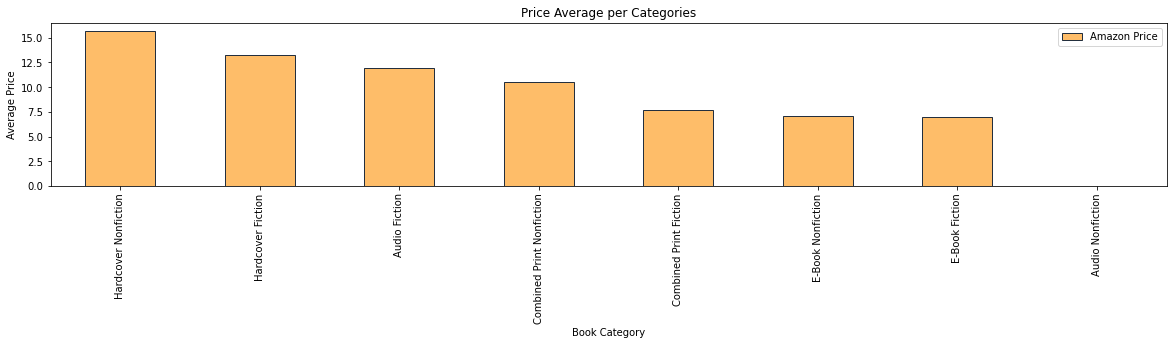

<Figure size 432x288 with 0 Axes>

In [13]:
# Price Average per Categories
price_mean.plot(kind="bar", figsize=(20,3),facecolor='#FEBD69',edgecolor='#232F3E')

# Set a title for the chart
plt.title("Price Average per Categories")
plt.ylabel('Average Price')
plt.show()
plt.tight_layout()

### The number of books in every categories

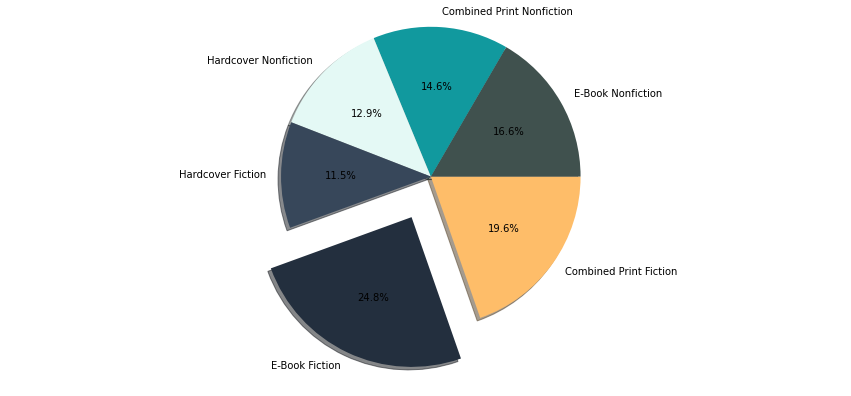

In [15]:
# Rating Average per Category 
plt.figure(figsize=(15,7))
total_categories=data_new2['Book Category'].value_counts().to_dict()
categories=list(total_categories.keys())[:-2]
totals=list(total_categories.values())[:-2]

colors = ["#232F3E","#FEBD69","#40514E","#11999E","#E4F9F5","#37475A"]
explode = (0.3,0,0,0,0,0)


plt.pie(totals, explode=explode, labels=categories, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=200)

plt.axis("equal")


plt.show()

### What is the Average rated books in every category? 

In [16]:
avg_rate_df=data_new2_df.groupby('Book Category').mean()['Amazon Rating Total'].sort_values(ascending=False)
avg_rate_df.to_frame()


,Amazon Rating Total
Book Category,
Audio Fiction,24740.000000
Hardcover Fiction,10675.836735
Audio Nonfiction,8828.000000
Combined Print Fiction,5488.456954
E-Book Fiction,5040.000000
Hardcover Nonfiction,4173.568807
Combined Print Nonfiction,3203.681416
E-Book Nonfiction,2977.571429


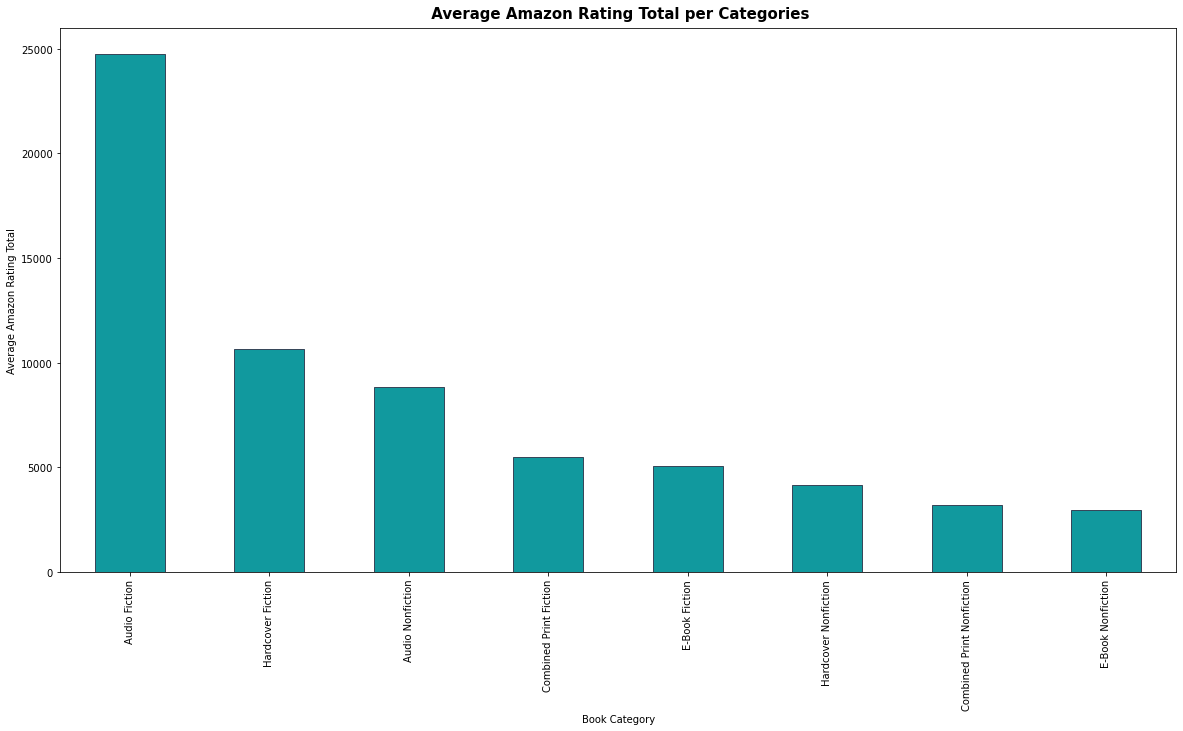

In [17]:
plt.figure(figsize=(15,7))

avg_rate_df.plot(kind='bar',facecolor='#11999E',edgecolor='#37475A')
plt.title(" Average Amazon Rating Total per Categories",fontsize= 15,pad=10,fontweight="bold")
plt.ylabel('Average Amazon Rating Total')
#plt.savefig('images/?.png')
plt.gcf().set_size_inches(20, 10)
plt.show()

### What is the range of book rate in every category

In [18]:
#Creat bins
bins = [ 2, 3, 4 , 5]
# Create the names for the four bins
group_names = ["<3", '3-4',"4-5"]
data_rate_baced_df=data_new2_df.copy()
data_rate_baced_df['Num of Amz Ratings_']=pd.cut(data_rate_baced_df['Num of Amz Ratings'], bins, labels=group_names,include_lowest=True)
data_rate_baced_df1=data_rate_baced_df.groupby(['Book Category','Num of Amz Ratings_']).count()['Amazon Rating Total'].reset_index().pivot_table(values='Amazon Rating Total',index=['Book Category'],columns=['Num of Amz Ratings_'])
data_rate_baced_df1

Num of Amz Ratings_,<3,3-4,4-5
Book Category,,,
Audio Fiction,NaN,NaN,4.0
Audio Nonfiction,NaN,NaN,1.0
Combined Print Fiction,NaN,11.0,140.0
Combined Print Nonfiction,NaN,7.0,106.0
E-Book Fiction,NaN,9.0,197.0
E-Book Nonfiction,NaN,5.0,135.0
Hardcover Fiction,NaN,11.0,87.0
Hardcover Nonfiction,1.0,2.0,106.0


<Figure size 1440x720 with 0 Axes>

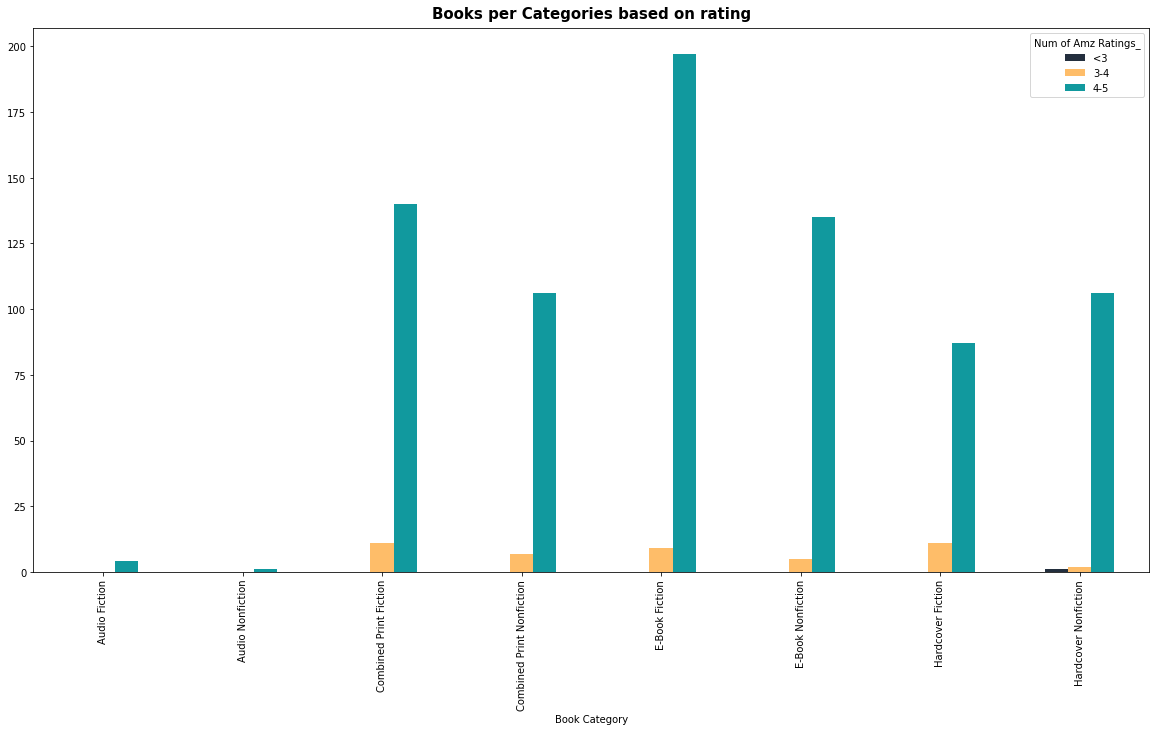

In [19]:
plt.figure(figsize=(20,10))
data_rate_baced_df1.plot.bar()
plt.title("Books per Categories based on rating",fontsize= 15,pad=10,fontweight="bold")
plt.gcf().set_size_inches(20, 10)

Text(0.5, 1.0, 'Amazon Rating Total per Categories')

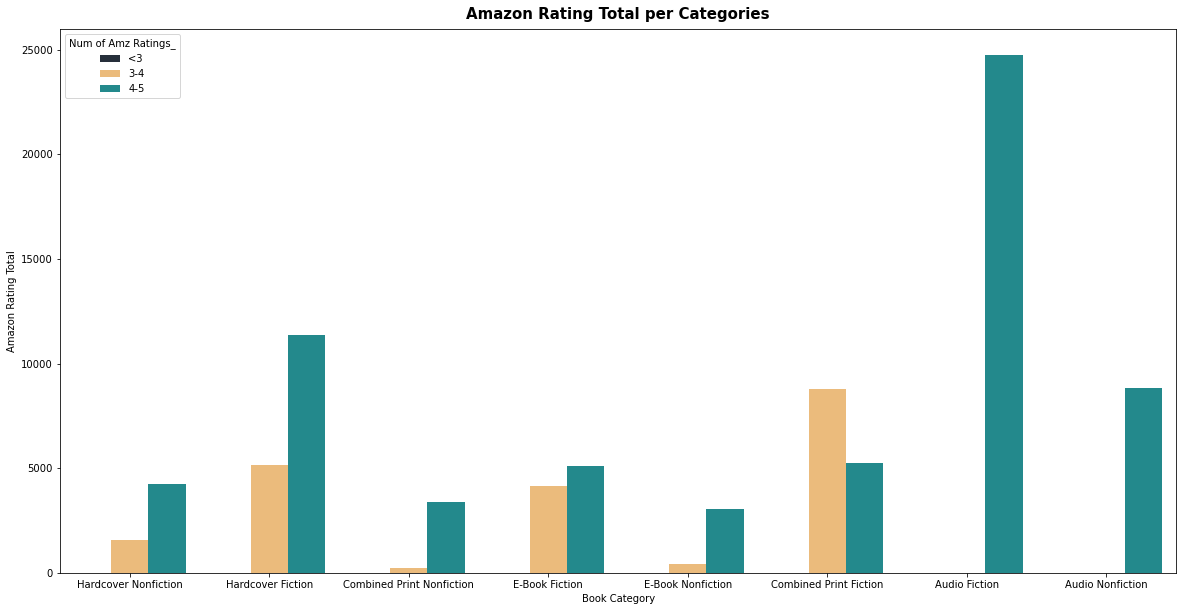

In [20]:
plt.figure(figsize=(20,10))
sns.barplot(x="Book Category", y="Amazon Rating Total",hue='Num of Amz Ratings_', data=data_rate_baced_df,
            ci=None,palette=costum_colors)
plt.title("Amazon Rating Total per Categories",fontsize= 15,pad=10,fontweight="bold")

### Which book has the lowest number of rating 


In [21]:
data_new2.loc[data_new2['Num of Amz Ratings']<3]

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Num of Amz Ratings,Amazon Rating Total,Amazon Price
145,9,9781982182915,Simon & Schuster,PERIL,Bob Woodward and Robert Costa,Hardcover Nonfiction,2022-01-23,9124143693,2.5,2.0,64.99


### Top 10 authers with most books in all categories?


In [22]:
Top_authers=data_new2['Author'].value_counts().head(10)
Top_authers

Danielle Steel      13
Nicholas Sparks      8
David Baldacci       8
Debbie Macomber      7
Michael Connelly     7
John Grisham         6
Nora Roberts         6
Stuart Woods         5
Kristin Hannah       5
James Patterson      5
Name: Author, dtype: int64

In [23]:
Top_authers_list=[data_new2.loc[data_new2['Author']==i] for i in Top_authers.index]
Top_authers_df=pd.concat(Top_authers_list)
Top_authers_df

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Num of Amz Ratings,Amazon Rating Total,Amazon Price
56,8,9780425285350,Delacorte,THE MISTRESS,Danielle Steel,E-Book Fiction,2022-02-02,B01E2GZ5FC,4.5,2652.0,6.99
137,11,9781984821584,Delacorte,INVISIBLE,Danielle Steel,Hardcover Fiction,2022-01-30,B091PJSK74,4.6,2502.0,14.99
188,8,9781984821553,Delacorte,FLYING ANGELS,Danielle Steel,Hardcover Fiction,2021-12-12,B08XBQ7BZ9,4.6,4759.0,14.99
231,15,9781984821522,Delacorte,THE BUTLER,Danielle Steel,Hardcover Fiction,2021-11-07,B08SJNJWZL,4.5,5437.0,14.99
322,9,9781984821492,Delacorte,COMPLICATIONS,Danielle Steel,Hardcover Fiction,2021-09-19,B08LMT1RZF,4.4,5458.0,14.99
...,...,...,...,...,...,...,...,...,...,...,...
39,12,9780316407168,"Little, Brown",CROSS THE LINE,James Patterson,E-Book Fiction,2022-02-02,B01C37XEUU,4.6,5037.0,9.99
164,11,9780316499149,"Little, Brown",FEAR NO EVIL,James Patterson,Hardcover Fiction,2022-01-09,B08Y8M2Y7T,4.6,9374.0,14.99
1050,7,9780316097512,"Little, Brown & Company","ALEX CROSS, RUN",James Patterson,Combined Print Fiction,2013-04-07,B0076DCP16,4.6,5398.0,9.99
1162,7,9780316210683,"Little, Brown & Company","MERRY CHRISTMAS, ALEX CROSS",James Patterson,Combined Print Fiction,2013-01-13,B007BGQBFY,4.5,5652.0,7.99


Text(0.5, 1.0, 'Top 10 authers with most books in all categories')

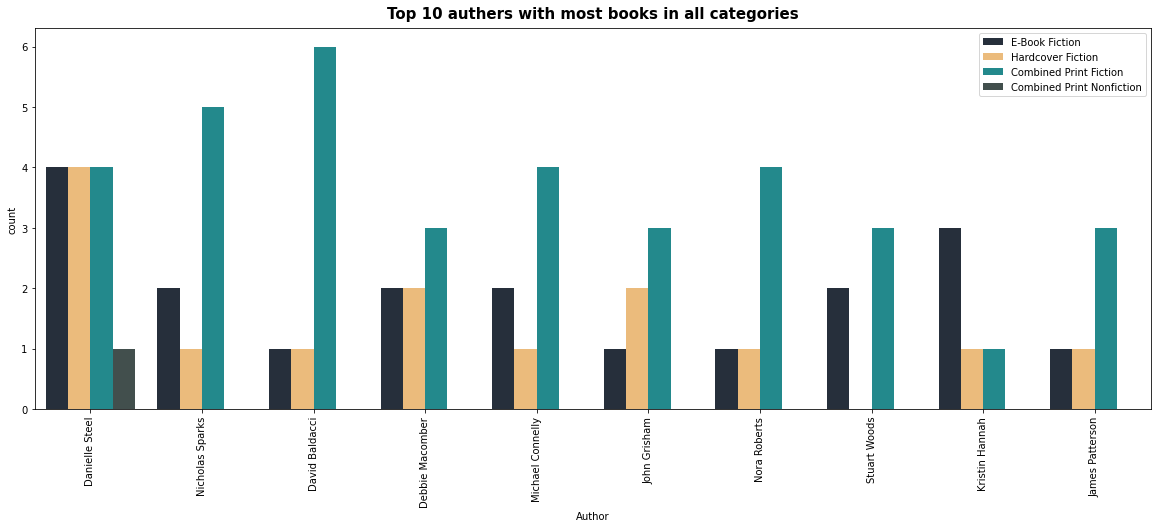

In [24]:
plt.figure(figsize=(20,7))
sns.countplot(x='Author',data=Top_authers_df,hue='Book Category',palette=costum_colors)
plt.legend(loc='upper right')
plt.xticks(rotation="vertical")
plt.title('Top 10 authers with most books in all categories',fontsize= 15,pad=10,fontweight="bold")

### What is most popular books in every categories

In [25]:
Top_rating_books_in_every_ctg=data_new2.groupby(['Book Category']).max()[['Amazon Rating Total']]
Top_rating_books_in_every_ctg

,Amazon Rating Total
Book Category,
Audio Fiction,25110.0
Audio Nonfiction,8828.0
Combined Print Fiction,63773.0
Combined Print Nonfiction,32697.0
E-Book Fiction,87948.0
E-Book Nonfiction,51560.0
Hardcover Fiction,132607.0
Hardcover Nonfiction,59410.0


In [26]:
#Top rating books in every categories
Top_rating_books_list=[data_new2.loc[data_new2['Amazon Rating Total']==i] for i in Top_rating_books_in_every_ctg['Amazon Rating Total'] ]
Top_rating_books_df=pd.concat(Top_rating_books_list)
Top_rating_books_df.set_index('Book Category')

,NYT Ranking,ISBN,Publisher,Title,Author,NYT Pub Date,Amazon Product ID,Num of Amz Ratings,Amazon Rating Total,Amazon Price
Book Category,,,,,,,,,,
Audio Fiction,7,DORORIG000029,Audible Originals,HEAVEN'S RIVER,Dennis E Taylor,2020-11-01,B0009811TW,4.7,25110.0,7.95
Audio Fiction,11,DORORIG000747,Audible Originals,THE SANDMAN,Neil Gaiman and Dirk Maggs,2020-10-01,B0009811TW,4.7,25110.0,7.95
Audio Nonfiction,13,9780786581795,Penguin Audio,THE GREAT INFLUENZA,John M. Barry,2020-06-01,B000F2C6Y6,4.6,8828.0,0.00
Combined Print Fiction,9,9780307588364,Crown Publishing,GONE GIRL,Gillian Flynn,2013-04-28,B0088UT8IO,4.1,63773.0,0.00
Combined Print Nonfiction,14,9781400064168,Random House Publishing,UNBROKEN,Laura Hillenbrand,2013-04-14,B004CJN7TG,4.8,32697.0,0.00
E-Book Fiction,15,9780698185395,Riverhead,THE GIRL ON THE TRAIN,Paula Hawkins,2016-12-11,1594634025,4.1,87948.0,7.48
E-Book Nonfiction,5,9780062316103,Harper,SAPIENS,Yuval Noah Harari,2016-12-11,B0741F3M7C,4.6,51560.0,0.00
Hardcover Fiction,1,9780525559474,Viking,THE MIDNIGHT LIBRARY,Matt Haig,2022-02-06,0525559477,4.3,132607.0,13.29
Hardcover Nonfiction,11,9780399590504,Random House,EDUCATED,Tara Westover,2021-09-19,0399590501,4.7,59410.0,13.00


### Which  books are  with  the most occurances in the Dataset?

In [27]:
books = data_new2['Title'].value_counts().head(11).to_dict()
books

{'UNSINKABLE': 3,
 'WILD': 3,
 'THE STORYTELLER': 3,
 'THE BLACK BOX': 3,
 'A MAN CALLED OVE': 3,
 'BETRAYAL': 3,
 'THE FORGOTTEN': 3,
 'SAFE HAVEN': 3,
 'QUIET': 3,
 'A GAME OF THRONES': 3,
 'THE WITNESS': 2}

In [28]:
books_df=pd.concat([data_new2.loc[data_new2['Title']==i] for i in books.keys()])
books_df.head(5)

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Num of Amz Ratings,Amazon Rating Total,Amazon Price
97,3,9780062213679,Morrow,UNSINKABLE,Debbie Reynolds and Dorian Hannaway,E-Book Nonfiction,2022-02-02,B00BW9ZW88,4.4,1295.0,0.00
980,9,9780062213655,Morrow,UNSINKABLE,Debbie Reynolds and Dorian Hannaway,Combined Print Nonfiction,2013-05-05,B00BW9ZW88,4.4,1295.0,0.00
1004,9,9780062213655,HarperCollins Publishers,UNSINKABLE,Debbie Reynolds and Dorian Hannaway,Combined Print Nonfiction,2013-04-28,B00BW9ZW88,4.4,1295.0,0.00
37,5,9780307476074,Vintage,WILD,Cheryl Strayed,Combined Print Nonfiction,2022-02-02,B01NCT5R2J,4.7,5.0,34.99
1008,3,9780307476074,Knopf Doubleday Publishing,WILD,Cheryl Strayed,Combined Print Nonfiction,2013-04-28,B01NCT5R2J,4.7,5.0,34.99


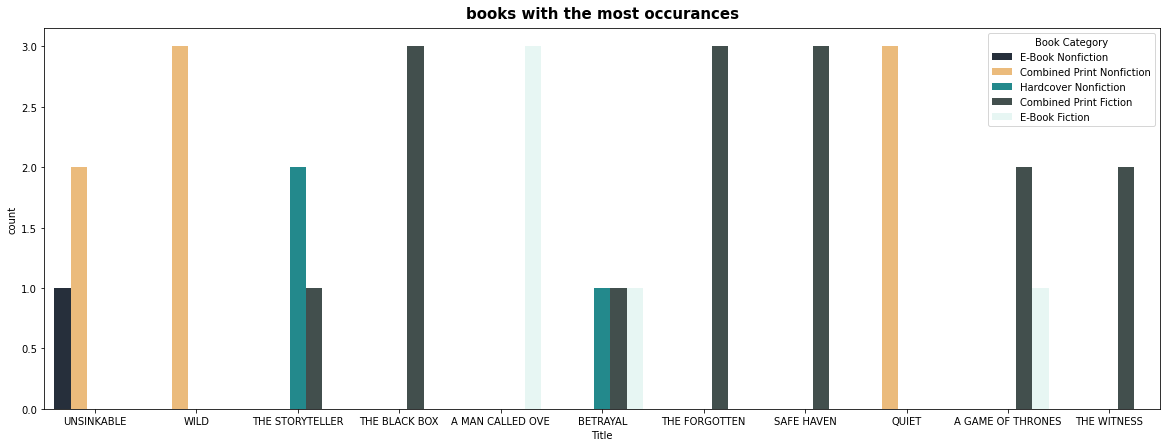

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(20,7))
sns.countplot(x='Title',data=books_df,hue='Book Category',palette=costum_colors)
plt.title('books with the most occurances',fontsize= 15,pad=10,fontweight="bold")
plt.show()
plt.tight_layout()

### Which are the top 10 most popular books overall?

In [30]:
most_rated_books_df=data_new2.sort_values(by="Amazon Rating Total", ascending=False).head(10)
most_rated_books_df

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Num of Amz Ratings,Amazon Rating Total,Amazon Price
28,1,9780525559474,Viking,THE MIDNIGHT LIBRARY,Matt Haig,Hardcover Fiction,2022-02-06,0525559477,4.3,132607.0,13.29
334,15,9781250178602,St. Martin's,THE FOUR WINDS,Kristin Hannah,Hardcover Fiction,2021-09-05,B0882VNQKS,4.5,90123.0,0.00
698,15,9780698185395,Riverhead,THE GIRL ON THE TRAIN,Paula Hawkins,E-Book Fiction,2016-12-11,1594634025,4.1,87948.0,7.48
29,6,9781501171345,Simon & Schuster,THE LAST THING HE TOLD ME,Laura Dave,Hardcover Fiction,2022-02-06,1501171348,4.3,67771.0,13.50
637,10,9780062416216,HarperCollins,THE ALCHEMIST,Paulo Coelho,E-Book Fiction,2017-01-15,0062315005,4.7,67078.0,8.89
1012,9,9780307588364,Crown Publishing,GONE GIRL,Gillian Flynn,Combined Print Fiction,2013-04-28,B0088UT8IO,4.1,63773.0,0.00
111,9,9780307588364,Crown,GONE GIRL,Gillian Flynn,Combined Print Fiction,2022-02-02,B0088UT8IO,4.1,63770.0,0.00
317,11,9780399590504,Random House,EDUCATED,Tara Westover,Hardcover Nonfiction,2021-09-19,0399590501,4.7,59410.0,13.00
891,14,9781501110375,Atria,IT ENDS WITH US,Colleen Hoover,E-Book Fiction,2016-08-28,1501110365,4.7,57852.0,12.79
1017,13,9780345803481,Knopf Doubleday Publishing,FIFTY SHADES OF GREY,E L James,Combined Print Fiction,2013-04-28,B007R07BK8,4.0,56999.0,0.00


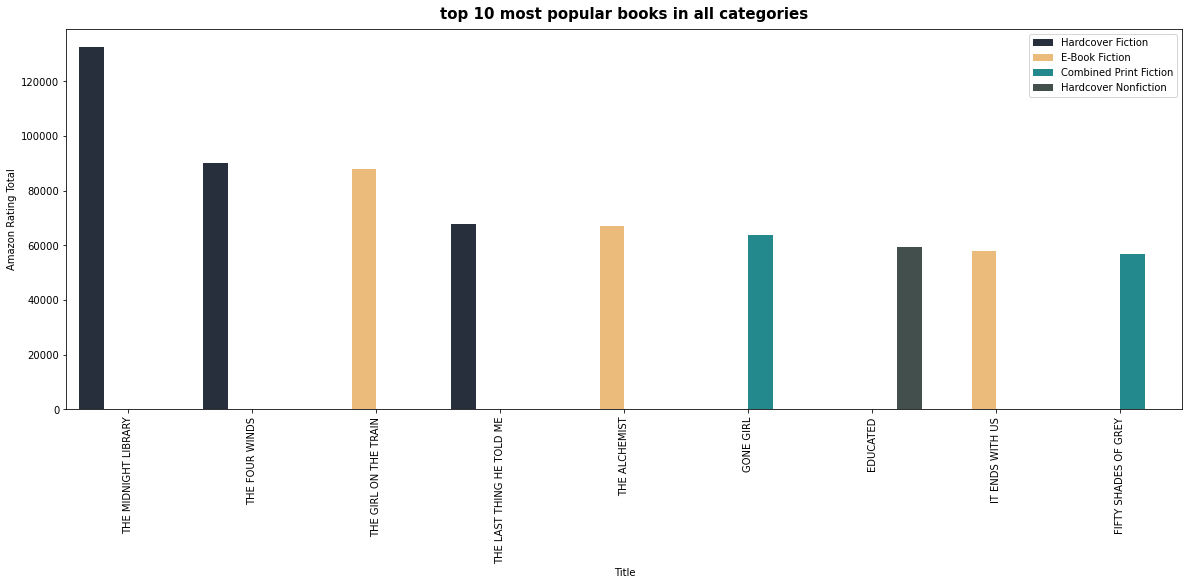

In [31]:
plt.figure(figsize=(20,7))
sns.barplot(x='Title',y='Amazon Rating Total',data=most_rated_books_df,hue='Book Category',palette=costum_colors)
plt.legend(loc='upper right')
plt.xticks(rotation="vertical")
plt.title('top 10 most popular books in all categories',fontsize= 15,pad=10,fontweight="bold")
plt.show()

In [32]:
def main_categories(x):
    if x in ["Audio Fiction","Audio Nonfiction"]:
        return "Audio"
    
    elif x in ["Hardcover fiction","Hardcover Nonfiction","Combined Print Nonfiction","Combined Print fiction"]:
        return "printed"
    
    else:
        return "E-Book"

    
def fiction_or_not_detector(x):
    if x in ["Audio Fiction","Hardcover Fiction","Combined Print Fiction","E-Book Fiction"]:
        return "Fiction"
    
    elif x in ["Audio Nonfiction","Hardcover Nonfiction","Combined Print Nonfiction","E-Book Nonfiction"]:
        return "Nonfiction"
    

In [33]:

    
df=data_new2_df.copy()
df['Fic_or_NotFic']= df['Book Category'].apply(fiction_or_not_detector)
df["Main_category"]=df['Book Category'].apply(main_categories)
df

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Num of Amz Ratings,Amazon Rating Total,Amazon Price,Fic_or_NotFic,Main_category
0,11,9781982168018,Gallery,TASTE,Stanley Tucci,Hardcover Nonfiction,2022-02-06,1982168013,4.7,3118.0,14.00,Nonfiction,printed
1,8,9780062888341,Harper,THE STRANGER IN THE LIFEBOAT,Mitch Albom,Hardcover Fiction,2022-02-06,006288834X,4.6,9966.0,15.07,Fiction,E-Book
2,10,9780385547932,Doubleday,TO PARADISE,Hanya Yanagihara,Hardcover Fiction,2022-02-06,B091XWH5T2,4.2,204.0,14.99,Fiction,E-Book
3,11,9780593465066,Viking,CALL US WHAT WE CARRY,Amanda Gorman,Hardcover Fiction,2022-02-06,0593465067,4.9,1794.0,14.53,Fiction,E-Book
4,12,9781982168438,Scribner,CLOUD CUCKOO LAND,Anthony Doerr,Hardcover Fiction,2022-02-06,B08TRMSR3Z,4.5,8792.0,15.99,Fiction,E-Book
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1232,18,9780312547745,St. Martin's Press,"THE WALKING DEAD, RISE OF THE GOVERNOR",Robert Kirkman and Jay Bonansinga,Combined Print Fiction,2012-11-04,B009RFHNB8,4.5,930.0,0.00,Fiction,E-Book
1233,15,9780399157707,Penguin Group,MAD RIVER,John Sandford,Combined Print Fiction,2012-11-04,B0085DP6EY,4.6,3011.0,9.99,Fiction,E-Book
1234,12,9781439152805,Atria Books,THE SECRET KEEPER,Kate Morton,Combined Print Fiction,2012-11-04,B009R5Q51W,4.5,7219.0,0.00,Fiction,E-Book
1235,2,9780345504982,Random House Publishing,THE TWELVE,Justin Cronin,Combined Print Fiction,2012-11-04,B009RFGP8K,4.5,4496.0,0.00,Fiction,E-Book


In [34]:
fic_df=df['Fic_or_NotFic'].value_counts()
main_cat_df=df['Main_category'].value_counts()
print(fic_df)
print("")
print(main_cat_df)

Fiction       459
Nonfiction    363
Name: Fic_or_NotFic, dtype: int64

E-Book     595
printed    222
Audio        5
Name: Main_category, dtype: int64


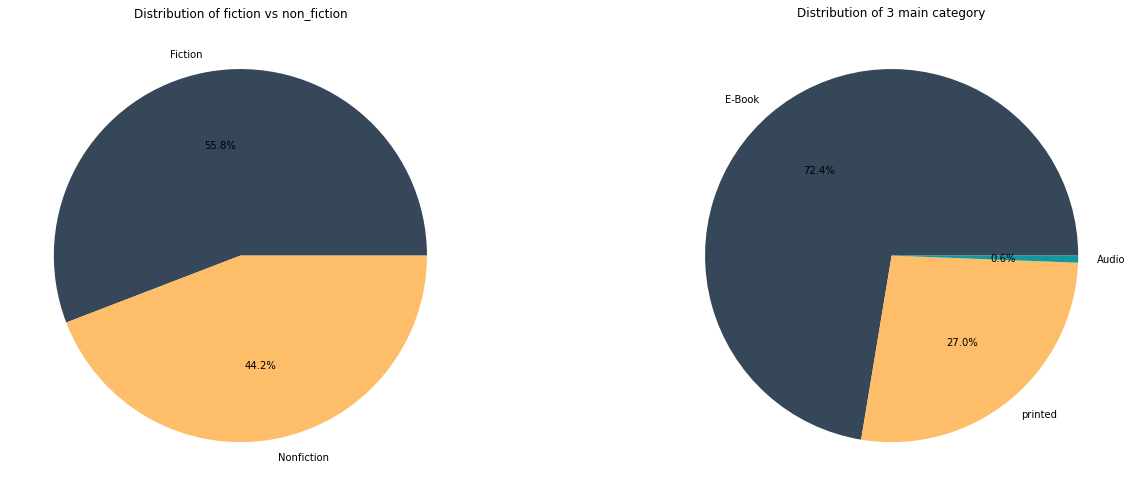

In [35]:
fig, axes = plt.subplots(1,2, figsize=(20, 7))
axes[0].pie(fic_df,labels=fic_df.index,autopct="%1.1f%%",colors=["#37475A","#FEBD69"])
axes[1].pie(main_cat_df,labels=main_cat_df.index,autopct="%1.1f%%",colors=["#37475A","#FEBD69","#11999E"])
axes[0].title.set_text('Distribution of fiction vs non_fiction')
axes[1].title.set_text('Distribution of 3 main category')
plt.tight_layout()

### What is the Average rated books in 3 main category? 

In [36]:
avg_rate_df=df.groupby('Main_category').mean()['Amazon Rating Total'].sort_values(ascending=False)
avg_rate_df.to_frame()

,Amazon Rating Total
Main_category,
Audio,21557.600000
E-Book,5596.788235
printed,3679.887387


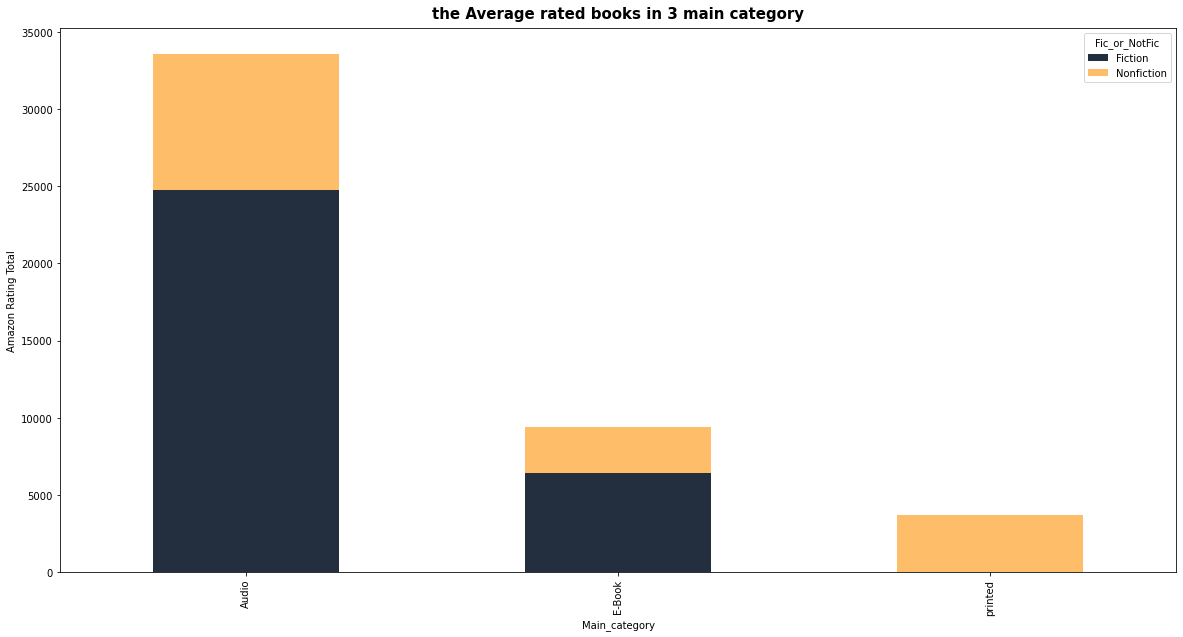

In [37]:
avg_rate_df=df.groupby(['Main_category','Fic_or_NotFic']).mean()['Amazon Rating Total'].unstack()
avg_rate_df.plot(kind='bar', stacked=True)
plt.ylabel("Amazon Rating Total")
plt.title('the Average rated books in 3 main category',fontsize= 15,pad=10,fontweight="bold")
plt.gcf().set_size_inches(20, 10)

### What is the Average book price in 3 main category?

In [38]:
df.groupby(['Main_category','Fic_or_NotFic']).mean()['Amazon Price']

Main_category  Fic_or_NotFic
Audio          Fiction          11.960000
               Nonfiction        0.000000
E-Book         Fiction           8.464308
               Nonfiction        7.089429
printed        Nonfiction       13.027477
Name: Amazon Price, dtype: float64

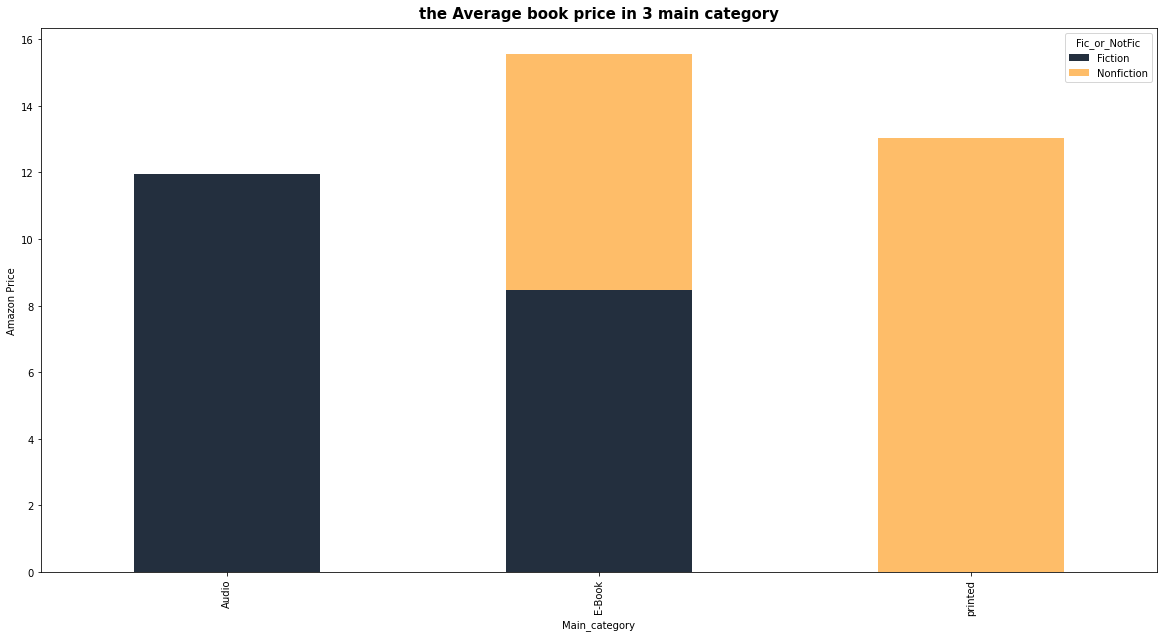

In [39]:
avg_price_df=df.groupby(['Main_category','Fic_or_NotFic']).mean()['Amazon Price'].unstack()
avg_price_df.plot(kind='bar', stacked=True)
plt.ylabel("Amazon Price")
plt.title('the Average book price in 3 main category',fontsize= 15,pad=10,fontweight="bold")
plt.gcf().set_size_inches(20, 10)

### Find the some books that is more than in one categories and compare the price

In [40]:
books=df['Title'].value_counts().head(19).to_frame()
books

,Title
BETRAYAL,3
SAFE HAVEN,3
THE HOST,2
THE GUARDIAN,2
"CARRY ON, WARRIOR",2
LIFE OF PI,2
A GAME OF THRONES,2
WILD,2
THE IMMORTAL LIFE OF HENRIETTA LACKS,2
THE FORGOTTEN,2


In [41]:
books_df=pd.concat([df.loc[data_new2['Title']==i] for i in books.index])
books_df=books_df[books_df['Amazon Price']!=0]
books_df.head(5)

,NYT Ranking,ISBN,Publisher,Title,Author,Book Category,NYT Pub Date,Amazon Product ID,Num of Amz Ratings,Amazon Rating Total,Amazon Price,Fic_or_NotFic,Main_category
185,14,9780593186329,Dutton,BETRAYAL,Jonathan Karl,Hardcover Nonfiction,2021-12-19,059318632X,4.8,2843.0,21.99,Nonfiction,printed
977,10,9781420124323,Kensington,BETRAYAL,Fern Michaels,E-Book Fiction,2016-07-24,B004NEW516,4.6,498.0,4.99,Fiction,E-Book
1114,17,9780440245223,Random House Publishing,BETRAYAL,Danielle Steel,Combined Print Fiction,2013-02-24,B005BUG6TI,4.6,2222.0,7.99,Fiction,E-Book
1054,12,9781455523542,Grand Central Publishing,SAFE HAVEN,Nicholas Sparks,Combined Print Fiction,2013-04-07,1455523542,4.7,10178.0,8.99,Fiction,E-Book
1076,6,9781455523559,Grand Central Publishing,SAFE HAVEN,Nicholas Sparks,Combined Print Fiction,2013-03-24,147894837X,4.7,10178.0,6.74,Fiction,E-Book


Text(0.5, 1.0, 'Comparing the price of books in 2 categories')

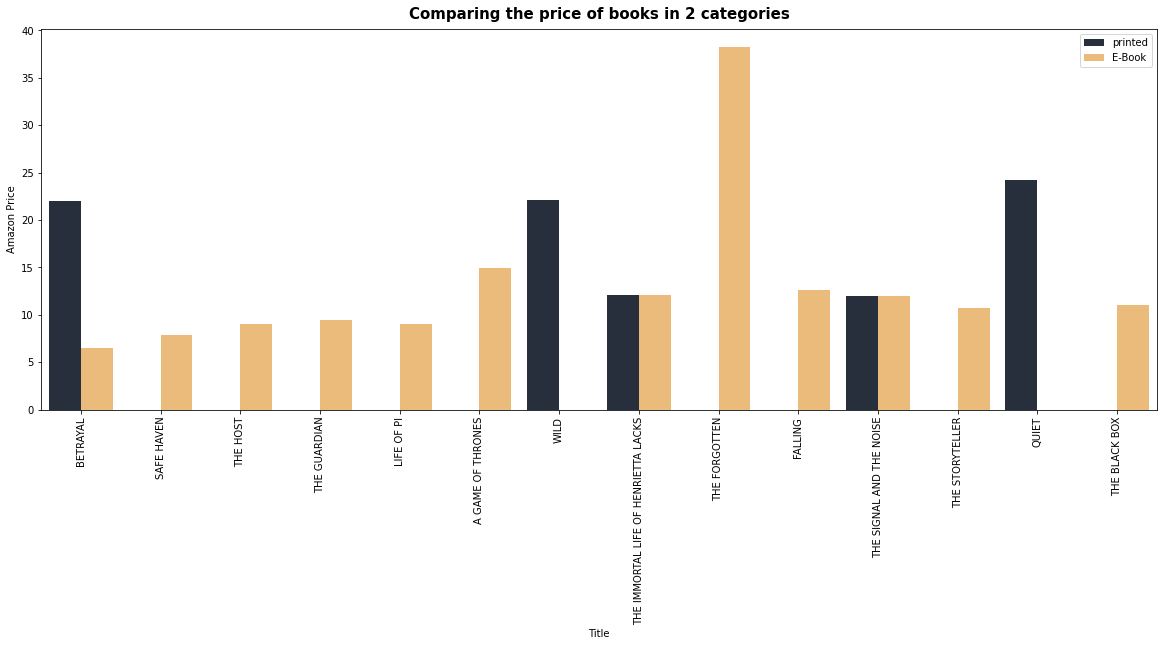

In [42]:
plt.figure(figsize=(20,7))
sns.barplot(x='Title',y='Amazon Price',data=books_df,hue='Main_category',palette=costum_colors,ci=None)
plt.legend(loc='upper right')
plt.xticks(rotation="vertical")
plt.title('Comparing the price of books in 2 categories',fontsize= 15,pad=10,fontweight="bold")

### What is the Amazon star Ratings of The book with a rank 1 from NYT?

In [105]:
rank_1_df=df.loc[df['NYT Ranking']==1][["Title","Author","Book Category","NYT Ranking","Num of Amz Ratings","Amazon Rating Total","Main_category"]]
rank_1_df

,Title,Author,Book Category,NYT Ranking,Num of Amz Ratings,Amazon Rating Total,Main_category
7,THE 1619 PROJECT,"edited Nikole Hannah-Jones, Caitlin Roper, Il...",Hardcover Nonfiction,1,4.8,4021.0,printed
28,THE MIDNIGHT LIBRARY,Matt Haig,Hardcover Fiction,1,4.3,132607.0,E-Book
57,LET'S EXPLORE DIABETES WITH OWLS,David Sedaris,Combined Print Nonfiction,1,4.4,2549.0,printed
58,HIDDEN FIGURES,Margot Lee Shetterly,E-Book Nonfiction,1,4.6,5819.0,E-Book
107,RED-HANDED,Peter Schweizer,Hardcover Nonfiction,1,4.9,45.0,printed
119,THE HIT,David Baldacci,Combined Print Fiction,1,4.6,11503.0,E-Book
633,THE WRONG SIDE OF GOODBYE,Michael Connelly,E-Book Fiction,1,4.7,11767.0,E-Book
669,THE SEVENTH PLAGUE,James Rollins,E-Book Fiction,1,4.6,1994.0,E-Book
686,TWO BY TWO,Nicholas Sparks,E-Book Fiction,1,4.5,10451.0,E-Book
867,FIRST STAR I SEE TONIGHT,Susan Elizabeth Phillips,E-Book Fiction,1,4.6,1428.0,E-Book


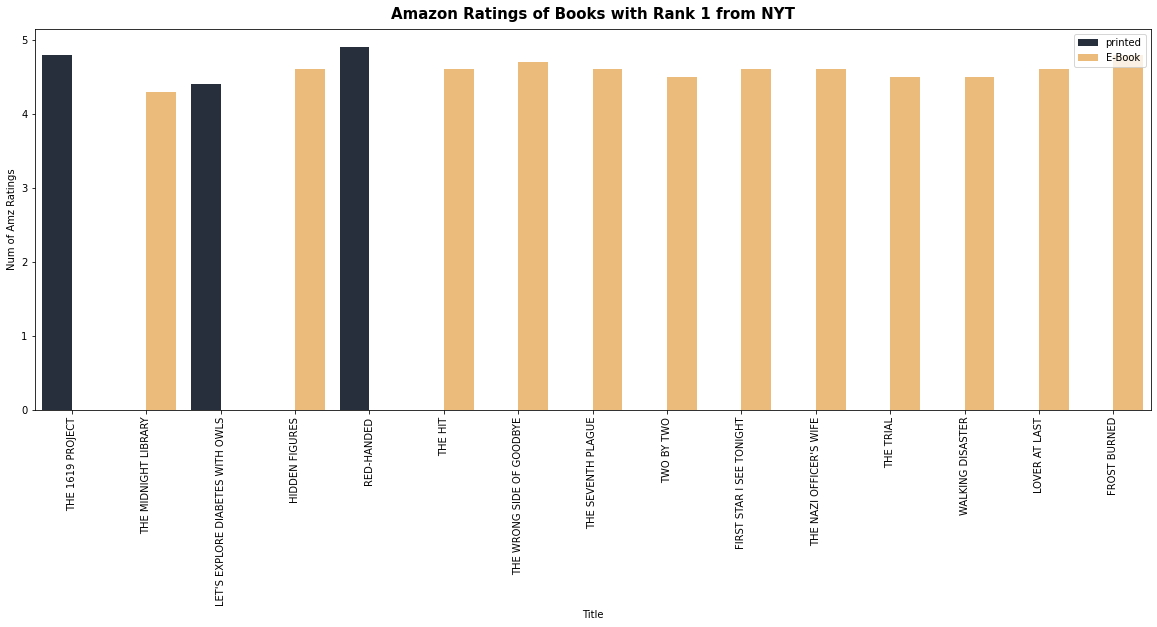

In [109]:
plt.figure(figsize=(20,7))
sns.barplot(x='Title',y='Num of Amz Ratings',data=rank_1_df,hue="Main_category",palette=costum_colors)
plt.xticks(rotation="vertical")
plt.title('Amazon Ratings of Books with Rank 1 from NYT',fontsize= 15,pad=10,fontweight="bold")
plt.legend(loc='upper right')
plt.show()

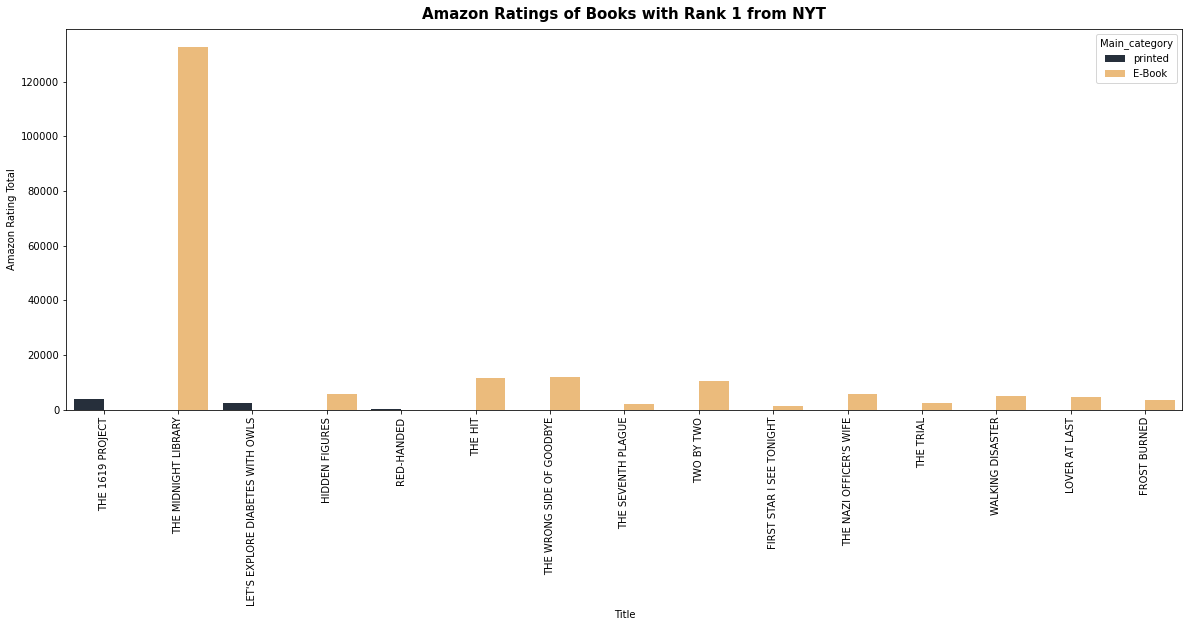

In [110]:
plt.figure(figsize=(20,7))
sns.barplot(x='Title',y='Amazon Rating Total',data=rank_1_df,hue="Main_category",palette=costum_colors)
plt.xticks(rotation="vertical")
plt.title('Amazon Ratings of Books with Rank 1 from NYT',fontsize= 15,pad=10,fontweight="bold")
plt.show()

### What is the most famous book in this 3 main categories

In [46]:
Three_most_famous_book=df.groupby('Main_category').max()['Amazon Rating Total']
Three_most_famous_book

Main_category
Audio       25110.0
E-Book     132607.0
printed     59410.0
Name: Amazon Rating Total, dtype: float64

In [52]:
Top_rating_books_list=[df.loc[df['Amazon Rating Total']==i] for i in Three_most_famous_book]
Top_rating_books_df=pd.concat(Top_rating_books_list)
Top_rating_books_df.set_index('Main_category')[['Title','Author','Num of Amz Ratings','Amazon Rating Total','Book Category']]

,Title,Author,Num of Amz Ratings,Amazon Rating Total,Book Category
Main_category,,,,,
Audio,HEAVEN'S RIVER,Dennis E Taylor,4.7,25110.0,Audio Fiction
Audio,THE SANDMAN,Neil Gaiman and Dirk Maggs,4.7,25110.0,Audio Fiction
E-Book,THE MIDNIGHT LIBRARY,Matt Haig,4.3,132607.0,Hardcover Fiction
printed,EDUCATED,Tara Westover,4.7,59410.0,Hardcover Nonfiction


### The distribution of Amazon Rating Total in 3 main categories

In [90]:
audio_df=df[df['Main_category']=='Audio']
E_Book_df=df[df['Main_category']=='E-Book']
printed_df=df[df['Main_category']=='printed']

Text(0, 0.5, 'Frequency')

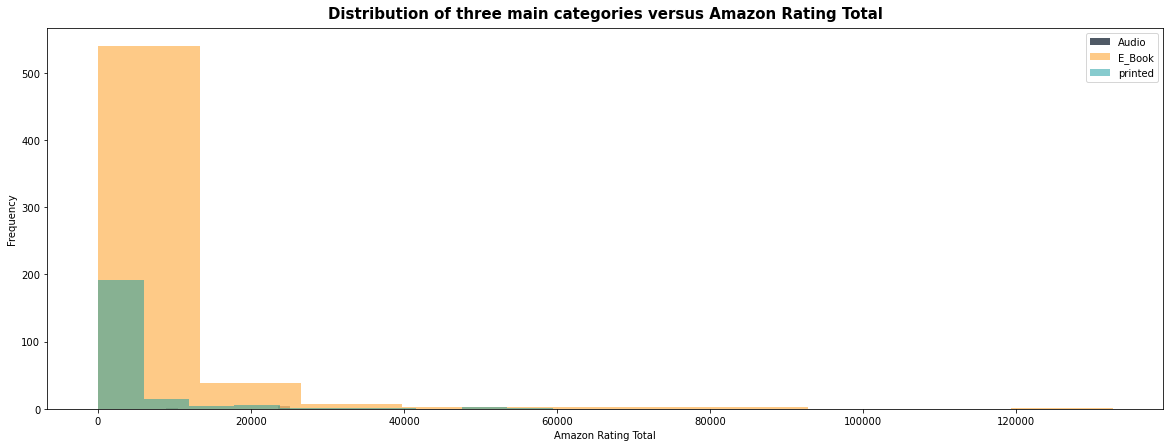

In [98]:
plt.figure(figsize=(20,7))
audio_df['Amazon Rating Total'].plot(kind='hist',label='Audio',alpha=.8,color='#232F3E')
E_Book_df['Amazon Rating Total'].plot(kind='hist',label='E_Book',alpha=.8,color='#FEBD69')
printed_df['Amazon Rating Total'].plot(kind='hist',label='printed',alpha=.5,color='#11999E')
plt.legend()
plt.title('Distribution of three main categories versus Amazon Rating Total',fontsize= 15,pad=10,fontweight="bold")
plt.xlabel("Amazon Rating Total")
plt.ylabel("Frequency")

In [112]:
df['Main_category'].value_counts()

E-Book     595
printed    222
Audio        5
Name: Main_category, dtype: int64

Text(0, 0.5, 'Frequency')

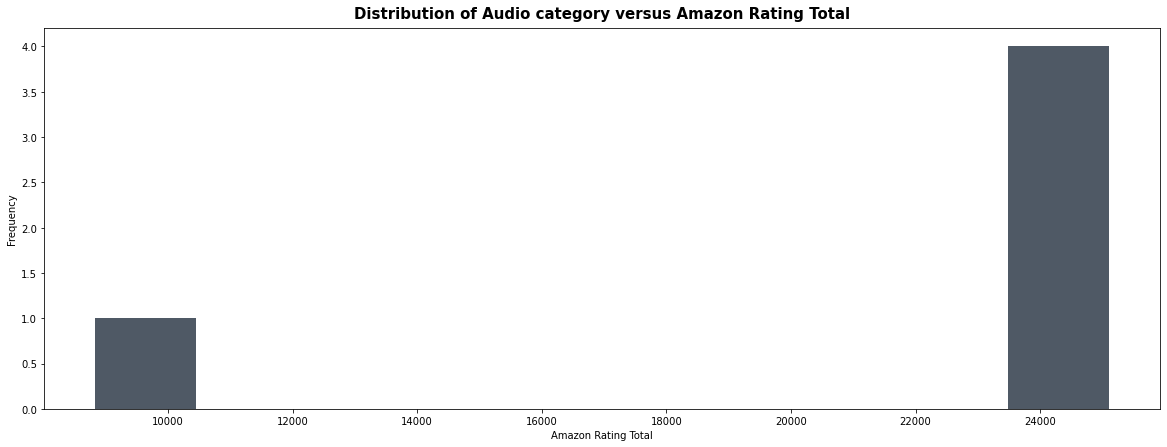

In [100]:
plt.figure(figsize=(20,7))
audio_df['Amazon Rating Total'].plot(kind='hist',label='Audio',alpha=.8,color='#232F3E')
plt.title('Distribution of Audio category versus Amazon Rating Total',fontsize= 15,pad=10,fontweight="bold")
plt.xlabel("Amazon Rating Total")
plt.ylabel("Frequency")

### 10 most expensive book and their categories

### top 10 Publisher

In [111]:
df['Main_category'].value_counts()

E-Book     595
printed    222
Audio        5
Name: Main_category, dtype: int64

The purpose of Our work is to determine whether book categories is related to the book popularity

<Figure size 1440x720 with 0 Axes>

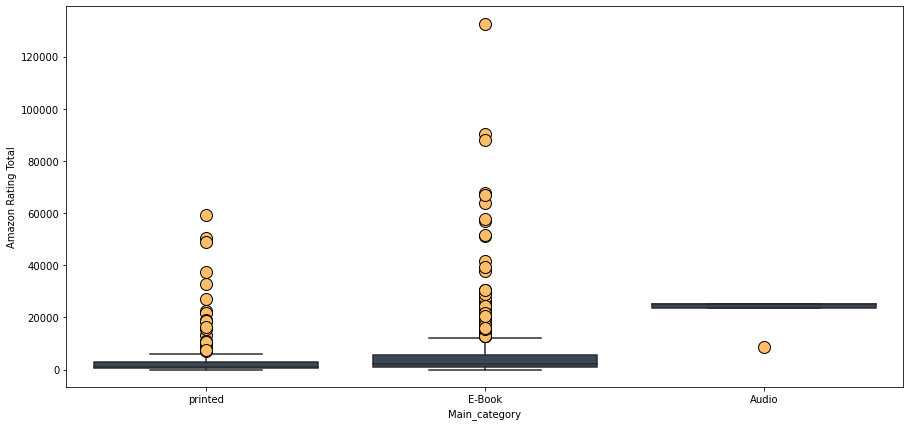

In [78]:
plt.figure(figsize=(20, 10))
flierprops = dict(marker='o', markerfacecolor="#FEBD69", markersize=12,
                  markeredgecolor='black')
plt.figure(figsize=(15,7))
sns.boxplot(x='Main_category',y='Amazon Rating Total',data=df,color="#37475A",flierprops=flierprops)
#plt.savefig('images/box_plot.png') 


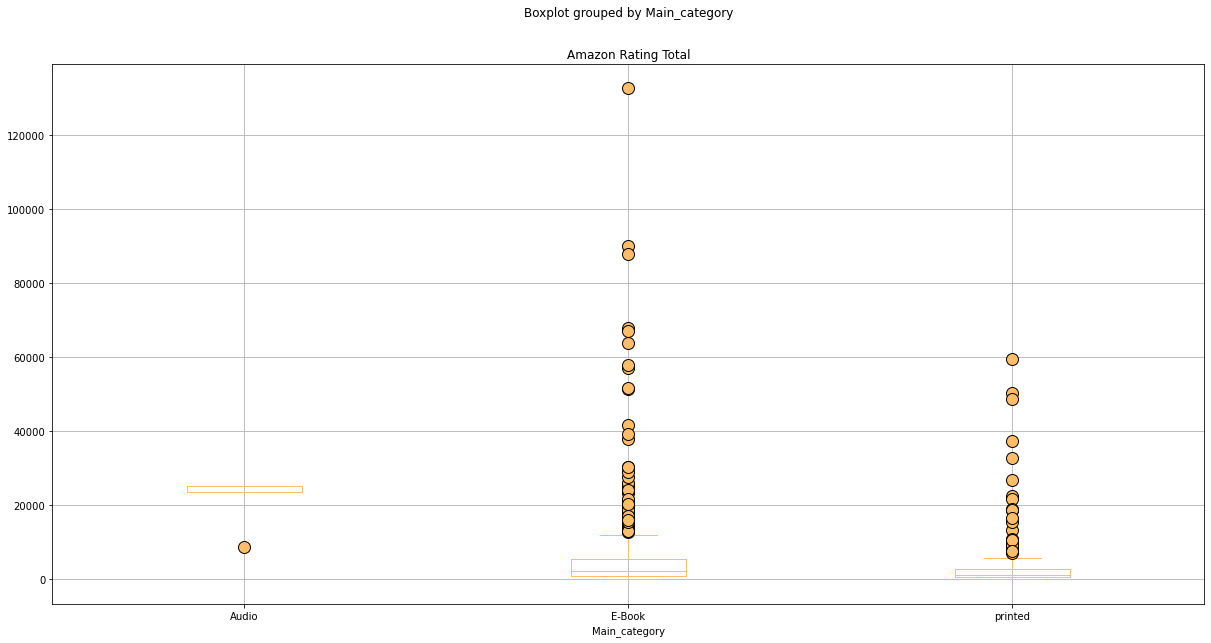

In [79]:
 # Create a boxplot to compare means
df.boxplot("Amazon Rating Total", by="Main_category", figsize=(20, 10),color="#FEBD69",flierprops=flierprops)

In [64]:
# Extract individual groups
group1 = df[df["Main_category"] == "Audio"]["Amazon Rating Total"]
group2 = df[df["Main_category"] == "E-Book"]["Amazon Rating Total"]
group3 = df[df["Main_category"] == "printed"]["Amazon Rating Total"]

In [65]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=9.205036249070568, pvalue=0.00011131992841825677)